# 1.Univarient Analysis

##  Import Libraries

In [2]:
import numpy as np
import pandas as pd
import re 
import time
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

## Import from a  clean Dataset 

In [3]:
df4=pd.read_csv(r"C:waterpurifier_data2.csv")
df4

,Unnamed: 0,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,Capacity (L/hr)
0,0,Blue Star,7499,11400,4.1,34.0,Free delivery,Electrical & Storage,8
1,2,Aqua Fresh,4751,16500,4.1,71.0,Free delivery,Electrical & Storage,12
2,3,Aquaguard Glory,11999,22000,4.2,45.0,Free delivery,Electrical & Storage,5
3,4,LIVPURE LIV-PEP-PRO-PLUS+,7999,15500,4.3,48.0,Free delivery,Electrical & Storage,12
4,5,KENT Ace,11999,19500,4.4,38.0,Free delivery,Electrical & Storage,5
...,...,...,...,...,...,...,...,...,...
692,977,AQUA water,5489,12999,4.3,57.0,Free delivery,Electrical & Storage,18
693,978,g.s. aquafresh,4566,12000,4.3,61.0,Free delivery,Electrical & Storage,5
694,980,AquaDart Mineral,4799,19999,3.6,76.0,Free delivery,Electrical & Storage,12
695,981,Aquafresh AURA,4445,13999,3.0,68.0,Free delivery,Electrical & Storage,12


In [4]:
df4.drop(columns='Unnamed: 0',inplace=True)
df4 

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,Capacity (L/hr)
0,Blue Star,7499,11400,4.1,34.0,Free delivery,Electrical & Storage,8
1,Aqua Fresh,4751,16500,4.1,71.0,Free delivery,Electrical & Storage,12
2,Aquaguard Glory,11999,22000,4.2,45.0,Free delivery,Electrical & Storage,5
3,LIVPURE LIV-PEP-PRO-PLUS+,7999,15500,4.3,48.0,Free delivery,Electrical & Storage,12
4,KENT Ace,11999,19500,4.4,38.0,Free delivery,Electrical & Storage,5
...,...,...,...,...,...,...,...,...
692,AQUA water,5489,12999,4.3,57.0,Free delivery,Electrical & Storage,18
693,g.s. aquafresh,4566,12000,4.3,61.0,Free delivery,Electrical & Storage,5
694,AquaDart Mineral,4799,19999,3.6,76.0,Free delivery,Electrical & Storage,12
695,Aquafresh AURA,4445,13999,3.0,68.0,Free delivery,Electrical & Storage,12


In [5]:
df4.dtypes

ProductName          object
Price(₹)              int64
Original_cost(₹)      int64
Rating              float64
Discount(%)         float64
Delivery_offers      object
Type_models          object
Capacity (L/hr)       int64
dtype: object

In [6]:
df4.shape

(697, 8)

In [7]:
df4.duplicated().sum()

0

## Exploratory Data Analysis

In [8]:
df4.head(10)

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,Capacity (L/hr)
0,Blue Star,7499,11400,4.1,34.0,Free delivery,Electrical & Storage,8
1,Aqua Fresh,4751,16500,4.1,71.0,Free delivery,Electrical & Storage,12
2,Aquaguard Glory,11999,22000,4.2,45.0,Free delivery,Electrical & Storage,5
3,LIVPURE LIV-PEP-PRO-PLUS+,7999,15500,4.3,48.0,Free delivery,Electrical & Storage,12
4,KENT Ace,11999,19500,4.4,38.0,Free delivery,Electrical & Storage,5
5,Pureit by,7999,18500,4.5,56.0,Free delivery,Electrical & Storage,20
6,KENT GOLD+(11015),2750,3300,3.9,16.0,Free delivery,Non - Electrical & Storage,5
7,KENT Ace,14999,21000,4.4,28.0,Free delivery,Electrical & Storage,5
8,Aqua Fresh,4445,13999,4.0,68.0,Free delivery,Electrical & Storage,12
9,Pureit Advanced,6999,11399,4.5,38.0,Free delivery,Electrical & Storage,12


# Countplot

In [9]:
df4["Type_models"].value_counts()

Electrical & Storage                617
Electrical & Non - Storage           46
Non - Electrical & Storage           29
Non - Electrical & Non - Storage      5
Name: Type_models, dtype: int64

In [10]:
df4['Type_models'].nunique()

4

In [11]:
df4['Type_models'].unique()

array(['Electrical & Storage', 'Non - Electrical & Storage',
       'Electrical & Non - Storage', 'Non - Electrical & Non - Storage'],
      dtype=object)

In [13]:
df4['ProductName'].value_counts()

Aqua Fresh             47
Grand plus             26
Royal Aquafresh        12
EUREKA FORBES          10
Blue Star              10
                       ..
Aquagrand Gold          1
Remino 25               1
Aquafresh FUSION        1
AQUA AQUAUNIX-WHITE     1
Aquafresh AURA          1
Name: ProductName, Length: 360, dtype: int64

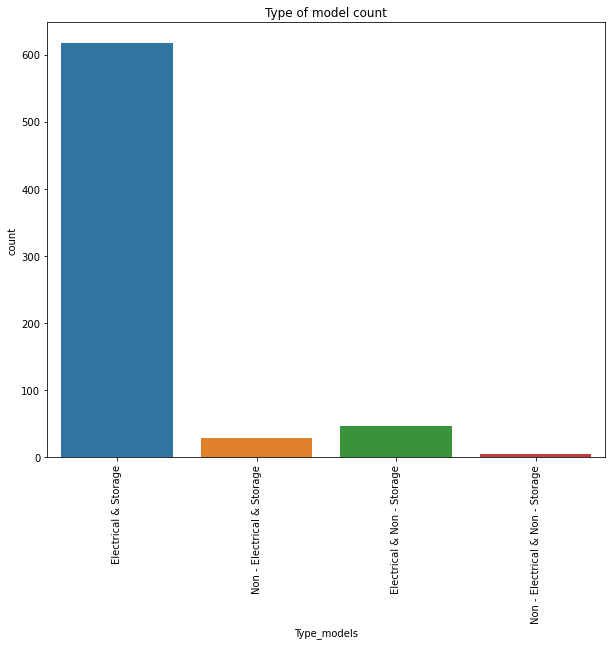

In [44]:
plt.figure(figsize=[10,8])
plt.title('Type of model count')
sns.countplot(x='Type_models', data=df4)
plt.ylabel('count')
plt.xlabel('Type_models')
plt.xticks(rotation = 90)
plt.show()
#sns.countplot(x="ProductName",data=df4)

# Observations
- Electrical & Storage purifiers having more then 600 nos
- Non-Electrical &  Non-Storage purifiers having less items upto 10 nos 

In [38]:
c=df4[df4["Rating"]>4.3]

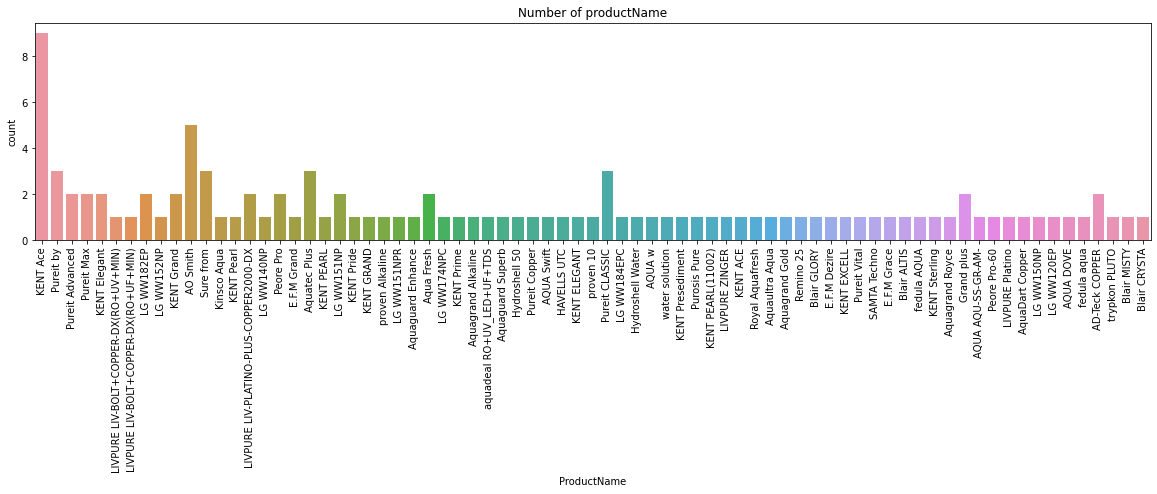

In [39]:
plt.figure(figsize=(20,4))
sns.countplot(x='ProductName', data=pd.DataFrame(c))
plt.title('Number of productName')
plt.ylabel('count')
plt.xlabel('ProductName')
plt.xticks(rotation = 90)
plt.show()

C:\Users\SAIGANESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


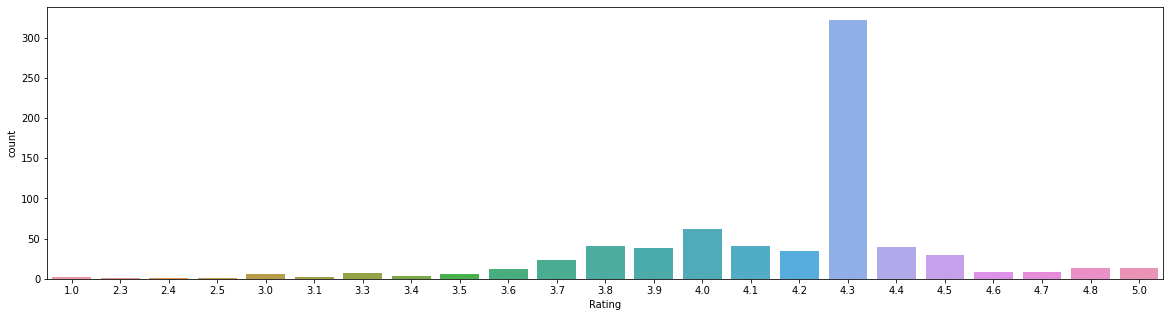

In [48]:
plt.figure(figsize=(20,5))
sns.countplot(df4['Rating'])
plt.show()

# Observations
- At rating 4.3 there was high ratings more then 300
- At rating 2.5 there was less ratings upto 5.


## Pie Chart

# categorical

In [64]:
df4["Type_models"].value_counts()

Electrical & Storage                638
Electrical & Non - Storage           44
Non - Electrical & Storage           28
Non - Electrical & Non - Storage      7
Name: Type_models, dtype: int64

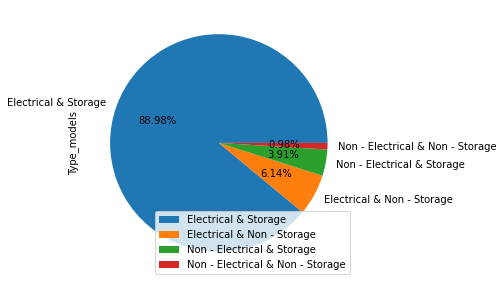

In [73]:
plt.figure(figsize=(5,5))
value=[638,44,28,7]
df4["Type_models"].value_counts().plot.pie(autopct="%.2f%%");
plt.legend(['Electrical & Storage','Electrical & Non - Storage','Non - Electrical & Storage','Non - Electrical & Non - Storage',],loc=4)
plt.show()

# Observations 
- Electrical & Storage purifiers are highest upto 88.98%
- Non-Electrical & Non-Storage purifiers are lowest upto 0.98%

In [71]:
df4["Delivery_offers"].value_counts()

Free delivery       595
Delivery charges    122
Name: Delivery_offers, dtype: int64

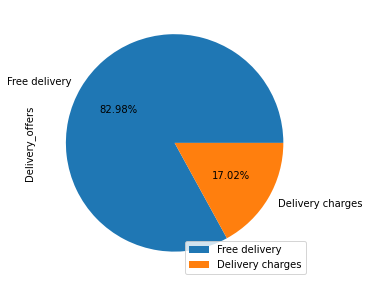

In [74]:
plt.figure(figsize=(5,5))
value=[595,122]
df4["Delivery_offers"].value_counts().plot.pie(autopct="%.2f%%");
plt.legend(['Free delivery','Delivery charges',],loc=4)
plt.show()

# Observatiions
- Free delivery items are more upto 82.98%
- Delivery charges items are less upto 17.02%`

In [75]:
df4["ProductName"].value_counts()

Aqua Fresh           54
Grand plus           24
KENT Ace             11
Aqua Active           9
V-Guard Rejive        9
                     ..
Aqua Supreme          1
KENT PEARL(11002)     1
Midea MWPRU080AL7     1
Hydroshell Copper     1
Muskpure ROYAL        1
Name: ProductName, Length: 376, dtype: int64

# Histograms

### Numerical

<AxesSubplot:>

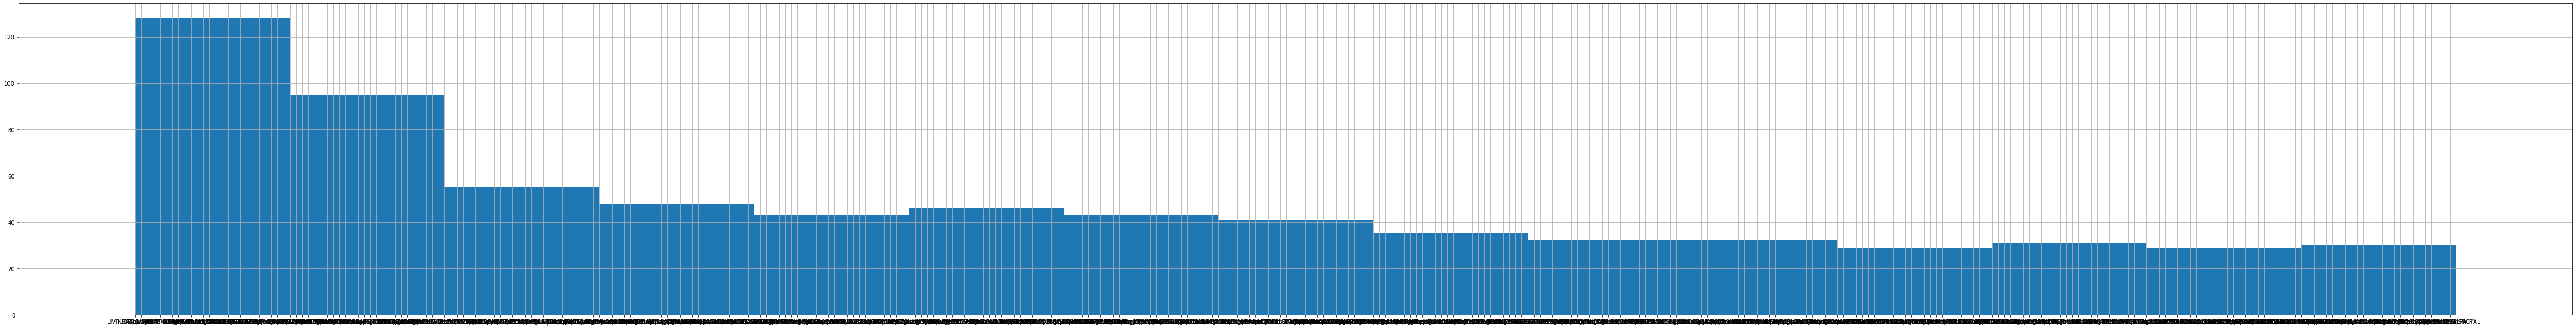

In [86]:
plt.figure(figsize=(80,10))
df4["ProductName"].hist(bins=15)

In [91]:
a=df4[df4['Rating']==4.8]


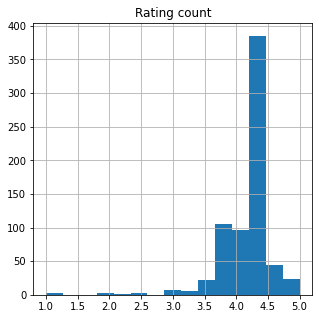

In [43]:
plt.figure(figsize=(5,5))
df4["Rating"].hist(bins=15)
plt.title('Rating count')
plt.show()

# Observations
- Rating from 4.2-4.4 more than 350 ratings are there which was highest

(array([705.,   9.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([2.140000e+02, 2.298160e+04, 4.574920e+04, 6.851680e+04,
        9.128440e+04, 1.140520e+05, 1.368196e+05, 1.595872e+05,
        1.823548e+05, 2.051224e+05, 2.278900e+05]),
 <BarContainer object of 10 artists>)

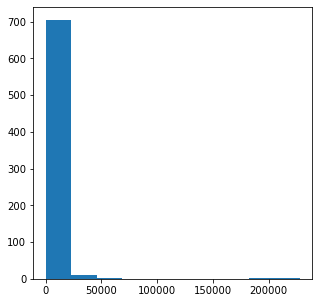

In [102]:
plt.figure(figsize=(5,5))
plt.hist(df4["Price(₹)"])

# Observations
- Price between 0-20,000/-Rs 700 purifiers are there which is highest.

# HIST+KDE(DIST)

### Numerical

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


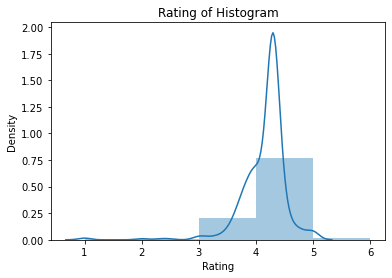

In [41]:
sns.distplot(df4["Rating"],kde=True,bins = [1.0,2.0,3.0,4.0,5.0,6.0])
plt.title('Rating of Histogram')
plt.show()

# Observations
- There was more than 1.75 probability for having rating range 4-4.5

C:\Users\SAIGANESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


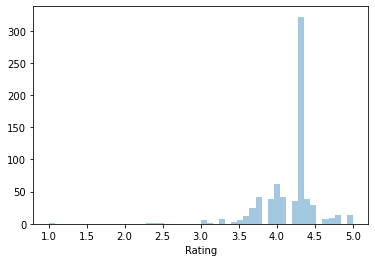

In [111]:
sns.distplot(df4["Rating"],kde=False,)
plt.show()

C:\Users\SAIGANESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


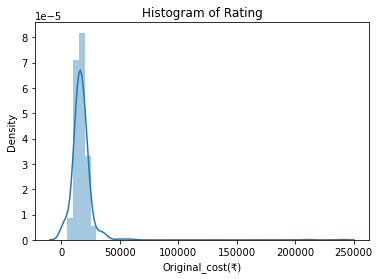

In [114]:
sns.distplot(df4["Original_cost(₹)"],kde=True,bins = [5000,10000,15000,20000,25000,30000])
plt.title('Histogram of Rating')
plt.show()

# Observations
- There was 6.7 probability for having original cost range 25,000/-Rs.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


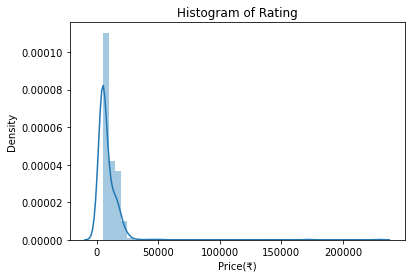

In [8]:
sns.distplot(df4["Price(₹)"],kde=True,bins = [5000,10000,15000,20000,25000,30000])
plt.title('Histogram of Rating')
plt.show()

# Observations
- There was 0.00008 probabi8lity for having price range 10,000/-Rs.

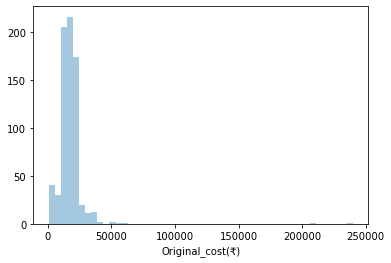

In [112]:
sns.distplot(df4["Original_cost(₹)"],kde=False,)
plt.show()

# Boxplot

### Numerical

In [119]:
c=df4[df4['Price(₹)']<20000]

<AxesSubplot:xlabel='Rating', ylabel='Price(₹)'>

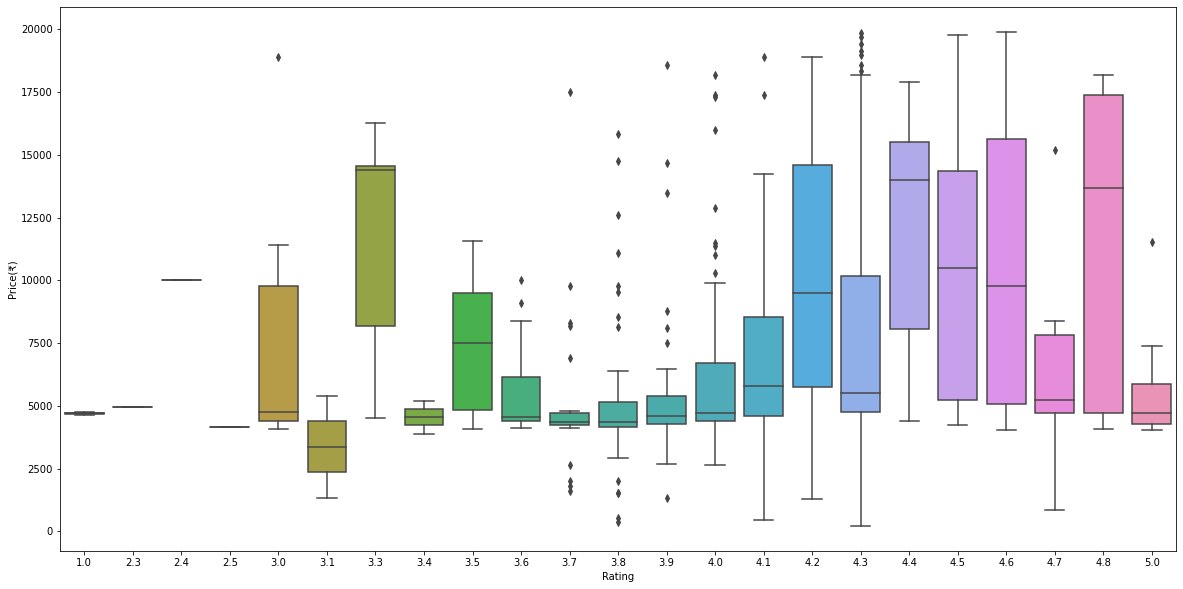

In [120]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Rating',y='Price(₹)',data=pd.DataFrame(c))

# Observations
- Ratings at 4.8 having more, in the price range betweeen 5000-17,400/-Rs.


In [31]:
s =df4[(df4["Original_cost(₹)"]>1000)]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Original_cost(₹)'>

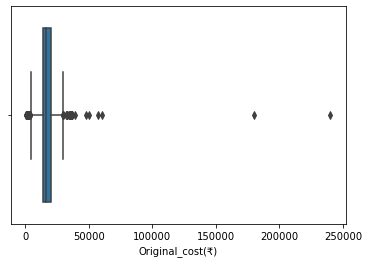

In [32]:
sns.boxplot(df4["Original_cost(₹)"],data=pd.DataFrame(s))

In [ ]:
# Observations 
- 



# Violin Plot

### Numerical

C:\Users\SAIGANESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

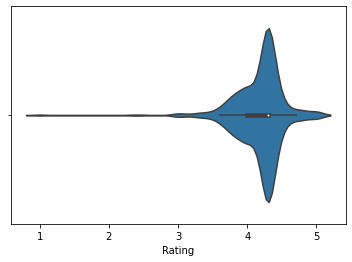

In [124]:
sns.violinplot(df4["Rating"])

C:\Users\SAIGANESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount(%)'>

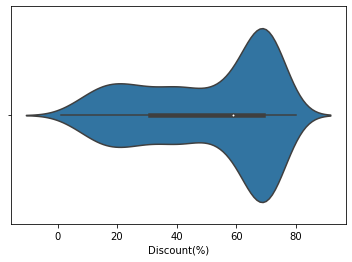

In [125]:
sns.violinplot(df4["Discount(%)"])

# Observations 
- At discount 70% there was more numbers of items.